In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

from torch.utils.data import Dataset, DataLoader

c:\Users\Sowmen\anaconda3\envs\DLenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_df = pd.read_csv('train.csv')
train_df

,image_path,label
0,train\n01443537\images\n01443537_0.JPEG,n01443537
1,train\n01443537\images\n01443537_1.JPEG,n01443537
2,train\n01443537\images\n01443537_10.JPEG,n01443537
3,train\n01443537\images\n01443537_100.JPEG,n01443537
4,train\n01443537\images\n01443537_101.JPEG,n01443537
...,...,...
94995,train\n12267677\images\n12267677_95.JPEG,n12267677
94996,train\n12267677\images\n12267677_96.JPEG,n12267677
94997,train\n12267677\images\n12267677_97.JPEG,n12267677
94998,train\n12267677\images\n12267677_98.JPEG,n12267677


In [10]:
from dataset import TinyImagenet

train_dataset = TinyImagenet(train_df, triplet=False)

In [11]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=1, pin_memory=True)
len(train_loader)

23750

In [12]:
for image, label in train_loader:
    print(image.shape)
    print(label)
    break

torch.Size([4, 3, 128, 128])
tensor([ 38,  30, 150,  62])


In [17]:
id = 1
anchor, label = train_dataset[id]

print(anchor.shape)
# print(positive.shape)
print(label)

TypeError: Input tensor should be a float tensor. Got torch.uint8.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


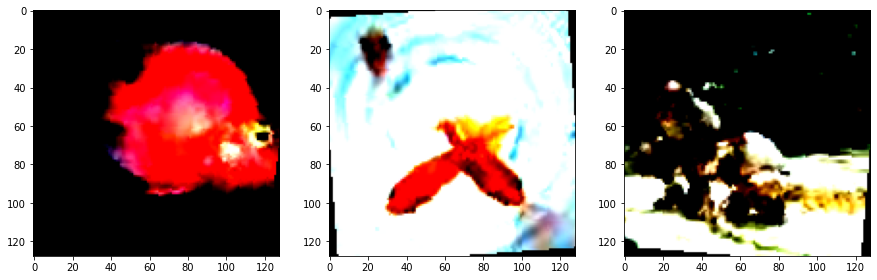

In [13]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.imshow(anchor.permute(1,2,0))
plt.subplot(132)
plt.imshow(positive.permute(1,2,0))
plt.subplot(133)
plt.imshow(negative.permute(1,2,0))
plt.show()